In [1]:
import pandas as pd

*  전처리는 total data에서 하고 독립변수와 종속변수의 관계를 볼 때에는 train data에서만 하는 것을 권장

In [8]:

activity = pd.read_csv("C:/Users/이명아/Desktop/빅콘/data_all/activity_all.csv",engine = "python")

In [9]:
combat  = pd.read_csv("C:/Users/이명아/Desktop/빅콘/data_all/combat_all.csv",engine='python')
payment = pd.read_csv("C:/Users/이명아/Desktop/빅콘/data_all/payment_all.csv",engine='python')
pledge = pd.read_csv("C:/Users/이명아/Desktop/빅콘/data_all/pledge_all.csv",engine='python')
trade = pd.read_csv("C:/Users/이명아/Desktop/빅콘/data_all/trade_all.csv",engine='python')

### Activity EDA

In [15]:
# 아이디 개수와 play 시간의 상관관계 
activity.head()

,Unnamed: 0,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,boss_monster,death,revive,exp_recovery,fishing,private_shop,game_money_change,enchant_count
0,0,1,75001,397380,aa,1.459994,0.000000,0.000000,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,1.119053,0.033934,0.0
1,1,1,75001,216231,aa,0.286785,2.244221,0.046989,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,0.000000,-0.013933,0.0
2,2,1,75711,308769,aa,1.049964,2.951697,0.321164,0.166247,0.003463,1,0.24537,0.246819,0.0,0.0,0.000000,-0.001983,0.0
3,3,1,72230,387177,aa,0.232272,4.035346,0.098944,0.000000,0.001732,0,0.00000,0.000000,0.0,0.0,0.000000,-0.028823,0.0
4,4,1,34253,339862,aa,1.102106,0.595805,0.003371,0.000000,0.000000,0,0.00000,0.000000,0.0,0.0,0.000000,0.011752,0.0


In [123]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

<BarContainer object of 28 artists>

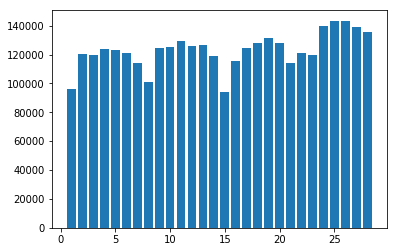

In [32]:
# 날짜별 playtime 
day_by_playtime = activity.groupby("day")["playtime"].sum()
plt.bar(day_by_playtime.index, day_by_playtime.values, align = 'center')

In [52]:
# 유저당 평균 캐릭터 보유 개수
activity[['acc_id','char_id']].drop_duplicates().groupby('acc_id').count().reset_index()['char_id'].mean()  #유저당 약 3.9개 아이디 사용

3.9199875

In [82]:
new1 = activity[['acc_id','char_id']].drop_duplicates().groupby('acc_id').count().reset_index()

In [75]:
# 게임 캐릭터 6개 이상인 유저의 수 : 18874/80000 오류?

count = 0

for i in range(len(new1)):
    if new1.iloc[i,1]>5:
        count  +=1
    
print(count)

18874


In [154]:
# 캐릭터 보유 개수와 playtime 관의 관계 보기
new1['char_cnt'] = ""
# new1['char_cnt'] = new1.apply(lambda x : 1 if new1['char_id']>3 else 0) 왜안되냐

In [157]:
for i in range(len(new1)):
    if new1.iloc[i,1] > 3:
        new1.iloc[i,2] = 1
    else:
        new1.iloc[i,2] = 0

In [162]:
new1.head()

,acc_id,char_id,char_cnt
0,1,2,0
1,2,1,0
2,3,9,1
3,5,3,0
4,7,3,0


In [187]:
new2 = activity[['acc_id','char_id','playtime']].groupby(['acc_id'])['playtime'].sum().reset_index()
new2.head()

,acc_id,playtime
0,1,89.666413
1,2,92.685947
2,3,2.728009
3,5,6.193126
4,7,1.268015


In [190]:
new3 = pd.merge(new2, new1, how='left', on='acc_id')
new3.head()

,acc_id,playtime,char_id,char_cnt
0,1,89.666413,2,0
1,2,92.685947,1,0
2,3,2.728009,9,1
3,5,6.193126,3,0
4,7,1.268015,3,0


In [212]:
aa= new3.groupby('char_cnt')['playtime'].mean()
aa.index= ['0','1']

<BarContainer object of 2 artists>

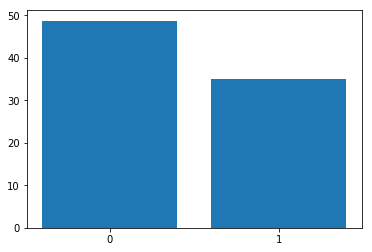

In [210]:
plt.bar(aa.index, aa.values)    # 캐릭터 수를 3개 이하로 가진 유저들의 평균 플레이 시간이 더 많았다

### train all EDA

In [222]:
train_df = pd.read_csv("ma_train_total.csv")

In [229]:
train_df.head()

,Unnamed: 0,day,acc_id,char_id,server,playtime,npc_kill,solo_exp,party_exp,quest_exp,...,server_trade_y.1,source_accessory_price,source_adena_price,source_armor_price,source_enchant_scroll_price,source_etc_price,source_spell_price,source_weapon_price,survival_time,amount_spent_avg
0,37347,1,2,233598,au,2.737490,0.000000,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,0.00000
1,24573,1,8,43437,ao,0.002370,0.000000,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,0.02031
2,24574,1,8,71899,ao,0.007110,0.000000,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,0.02031
3,24576,1,8,126227,ao,0.355518,3.035366,8.403418,0.0,0.093822,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,0.02031
4,24570,1,8,207949,ao,0.002370,0.000000,0.000000,0.0,0.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.0,0.02031


In [234]:
# solo_exp, party_exp, quest_exp 와 survival_time의 상관관계

new4 = train_df[['solo_exp','party_exp','quest_exp','survival_time']]
new4.corr(method='pearson')

# 경험치와 생존기간 사이에 관련이 있을것이라 생각했는데 그렇지 않음

,solo_exp,party_exp,quest_exp,survival_time
solo_exp,1.000000,0.059750,0.353281,-0.075918
party_exp,0.059750,1.000000,0.054048,-0.079704
quest_exp,0.353281,0.054048,1.000000,-0.040549
survival_time,-0.075918,-0.079704,-0.040549,1.000000


In [248]:
import math

In [260]:
# pledge_id 가 있는 사람과 없는 사람의 생존기간 차이

new5 = train_df[['acc_id','char_id','pledge_id','playtime']]
new5['pledge_xor'] = ""

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


In [275]:
def nan(x):
    if math.isnan(x):
        return 0
    else: 
        return 1

In [278]:
new5['pledge_xor'] = new5['pledge_id'].apply(lambda x : nan(x))

C:\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


<BarContainer object of 2 artists>

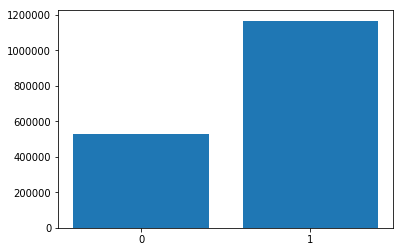

In [287]:
bb = new5.groupby('pledge_xor')['playtime'].sum()
bb.index = ['0','1']
plt.bar(bb.index, bb.values)

# 혈맹 아이디가 있는 유저가 playtime 합이 훨씬 더 높다 --> 대부분의 유저가 pledge_id를 갖고있기 때문

In [290]:
cc = new5.groupby('pledge_xor')['playtime'].mean()
cc
# pledge_id가 있는 유저가 평균적으로 playtime이 살짝 높다.

pledge_xor
0    1.029907
1    1.076719
Name: playtime, dtype: float64

In [296]:
new6 = train_df[['acc_id','char_id','class','playtime']]

In [310]:
new6.groupby('class').count().reset_index()
# 1-2-3-7-4-5-1-6 순으로 많음

,class,acc_id,char_id,playtime
0,0.0,129102,129102,129102
1,1.0,328006,328006,328006
2,2.0,268120,268120,268120
3,3.0,246501,246501,246501
4,4.0,212877,212877,212877
5,5.0,132749,132749,132749
6,6.0,41375,41375,41375
7,7.0,215941,215941,215941
